In [41]:
from prevelop import preparation, exploration, clustering, evaluation

__Data Preparation and Preprocessing__

In [42]:
### load cad-data
# for cad-data received from SIMUS, apply the following cleaning steps
file = 'demo_data/csvfolding-2025-02-26_16-43-04.csv'
num_columns = ['Volumen','L','B','H','Da max.','Di min.','Lrot','Gesamtanzahl Bohrungen','Anzahl Außenabsätze', 
               'Gesamtanzahl Eindrehungen außen','Gesamtanzahl Eindrehungen innen','Fasenbreite rechts', 
               'Endenwinkel rechts','Anzahl Innenabsätze']
cat_columns = ['Klasse','Eindrehungsart außen','Eindrehungsanordnung außen','Absatzform','Bohrungsanordnung',
               'Anbringung Bohrungsanordnung','Bohrungsart','Ende rechts','Innenform']
data, num_columns, cat_columns = preparation.load_simus_data(file, num_columns, cat_columns)

In [43]:
data

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_Ebene,Innenform_Einzeleindrehung,Innenform_ungleichmäßiger Einstich mit Ebene und Konus,Innenform_Rasteranordnung,Innenform_Rotationsteilinnenfläche,Innenform_Teilschräge,Innenform_einseitig steigend,Innenform_ungleichmäßiger Einstich Ebenen beidseitig,Innenform_freie Anordnung,Innenform_mehrfache Eindrehung
0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,12.12,6.60,3.80,3.80,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,12.12,6.60,3.80,3.80,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1851.14,62.00,13.50,4.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,31.20,9.00,4.84,4.84,4.84,1.4,9.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
99,6.31,2.50,2.50,2.00,2.50,0.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
100,18916.89,50.69,41.20,30.20,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
101,10682.60,45.99,38.20,30.20,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# manually preprocess the data
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler

### prepare the data
df_num = data[num_columns]
df_cat = data[cat_columns]

# scale the numerical columns with MaxAbsScaler
scaler = MaxAbsScaler().fit(df_num)
df_num_scaled = pd.DataFrame(data=scaler.transform(df_num), index=df_num.index, columns=df_num.columns)

# concatenate the subdataframes columnwise
data_preprocessed = pd.concat([df_num_scaled, df_cat], axis=1)

In [45]:
data_preprocessed

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_Ebene,Innenform_Einzeleindrehung,Innenform_ungleichmäßiger Einstich mit Ebene und Konus,Innenform_Rasteranordnung,Innenform_Rotationsteilinnenfläche,Innenform_Teilschräge,Innenform_einseitig steigend,Innenform_ungleichmäßiger Einstich Ebenen beidseitig,Innenform_freie Anordnung,Innenform_mehrfache Eindrehung
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.000190,0.016479,0.088764,0.125828,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.000190,0.016479,0.088764,0.125828,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.028984,0.154806,0.315347,0.132450,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.000489,0.022472,0.113058,0.160265,0.142353,0.098592,0.050000,0.000000,0.2,0.0,...,0,0,0,0,0,0,0,0,0,0
99,0.000099,0.006242,0.058398,0.066225,0.073529,0.000000,0.011111,0.000000,0.2,0.0,...,0,0,0,0,0,0,0,0,0,0
100,0.296194,0.126567,0.962392,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
101,0.167264,0.114831,0.892315,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


__Exploration__

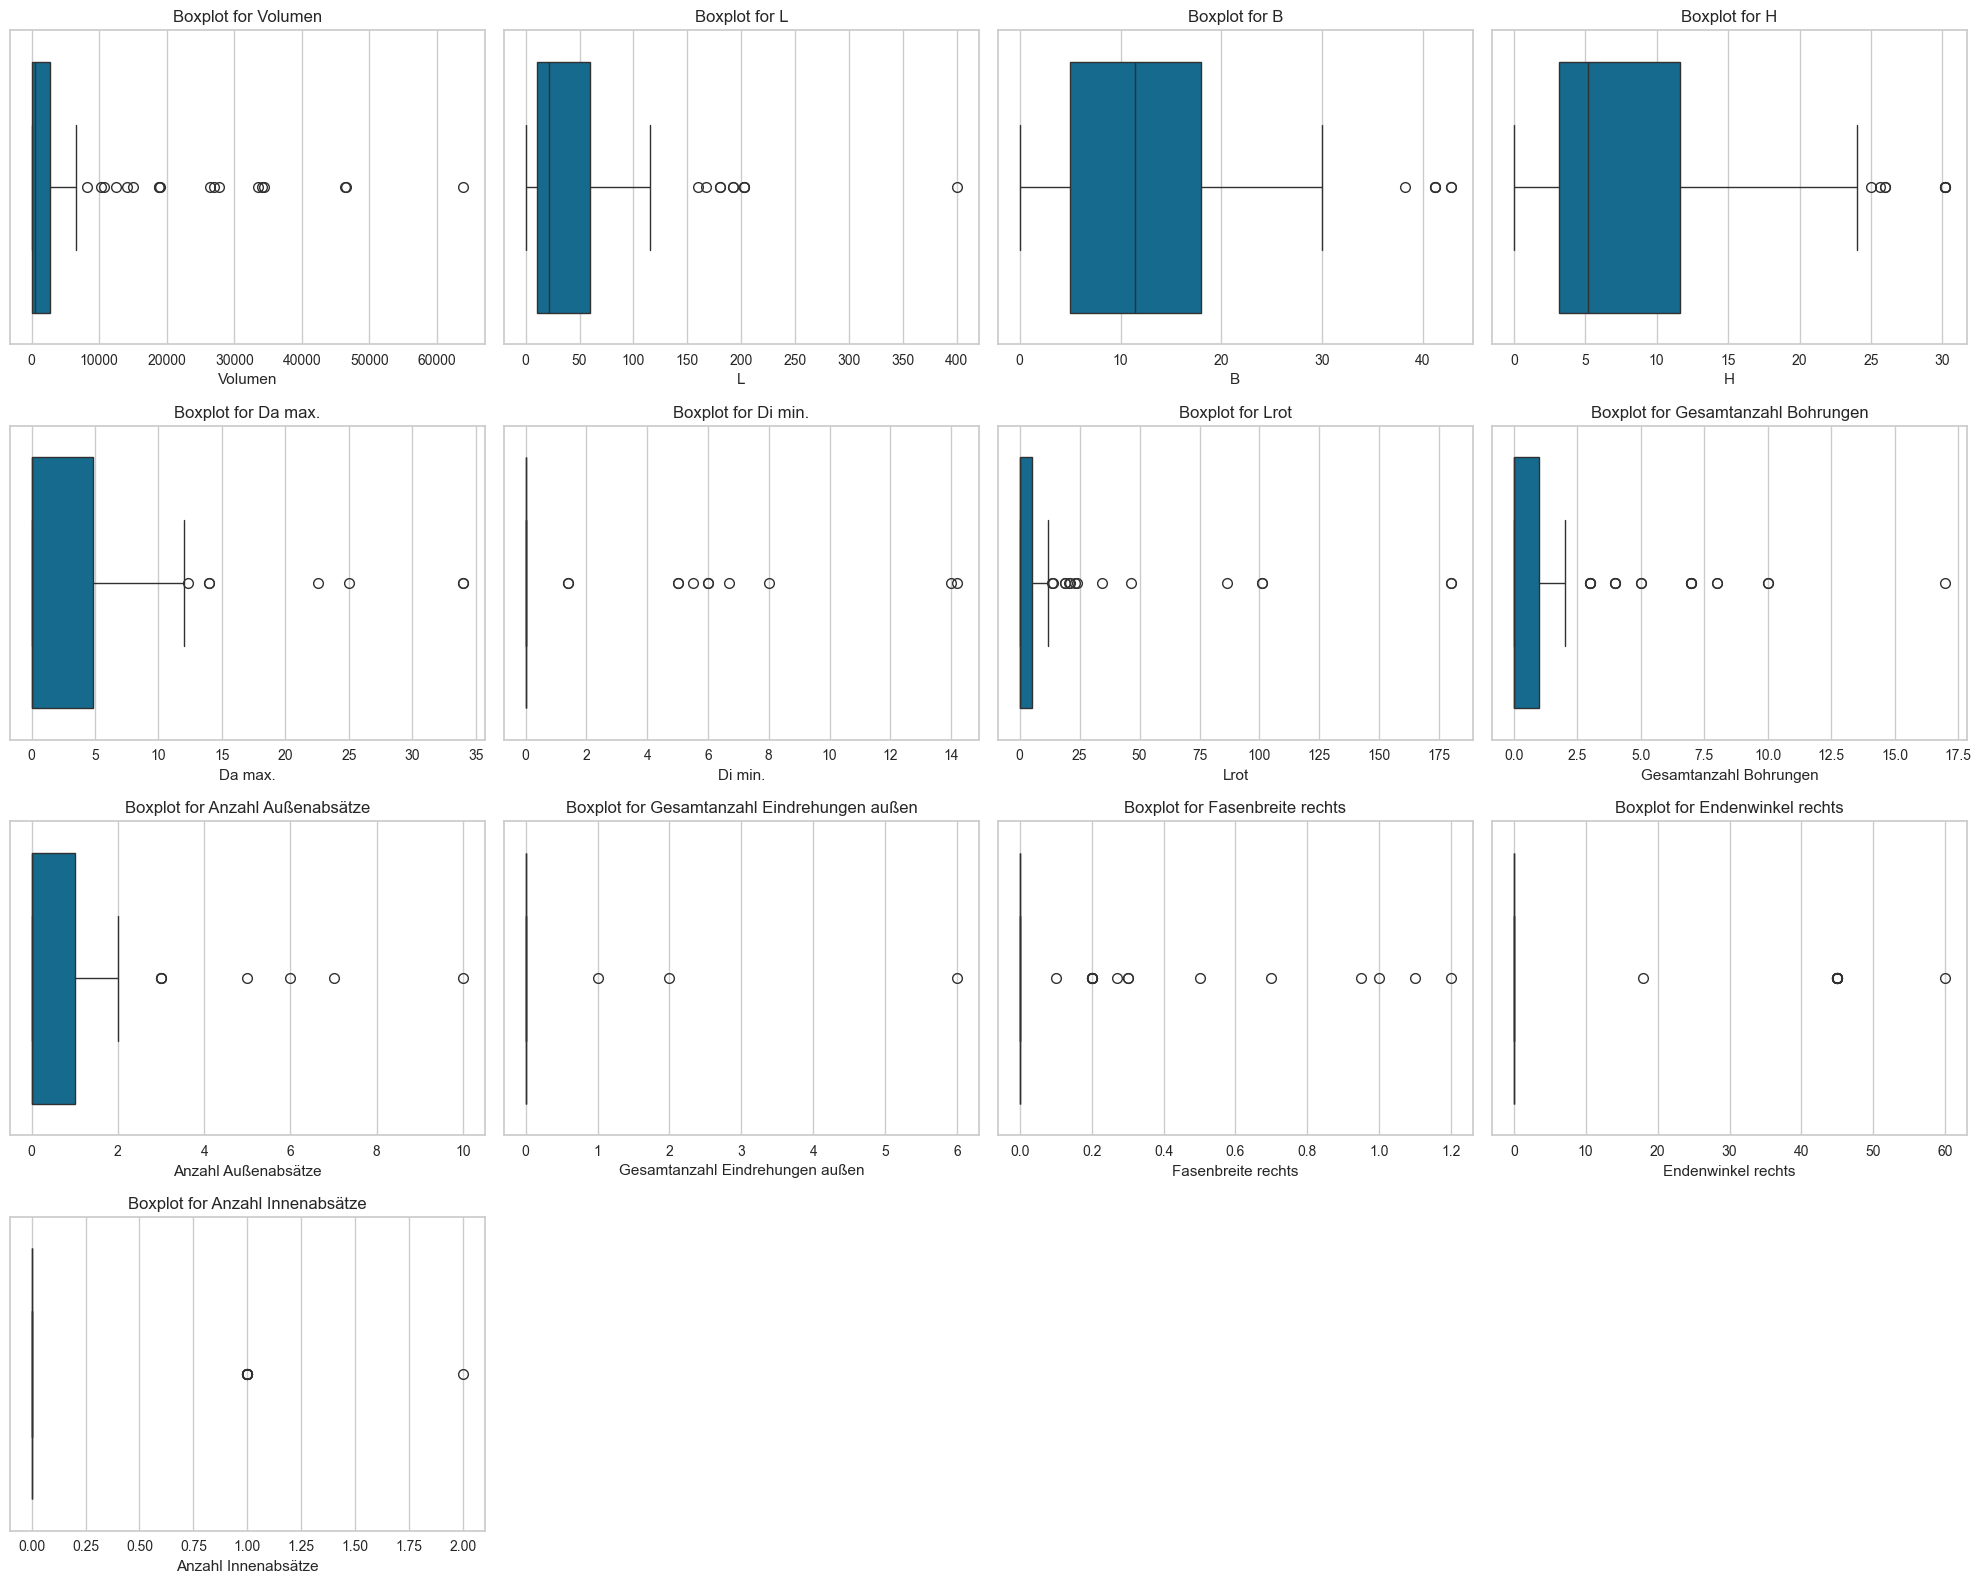

In [46]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_columns)

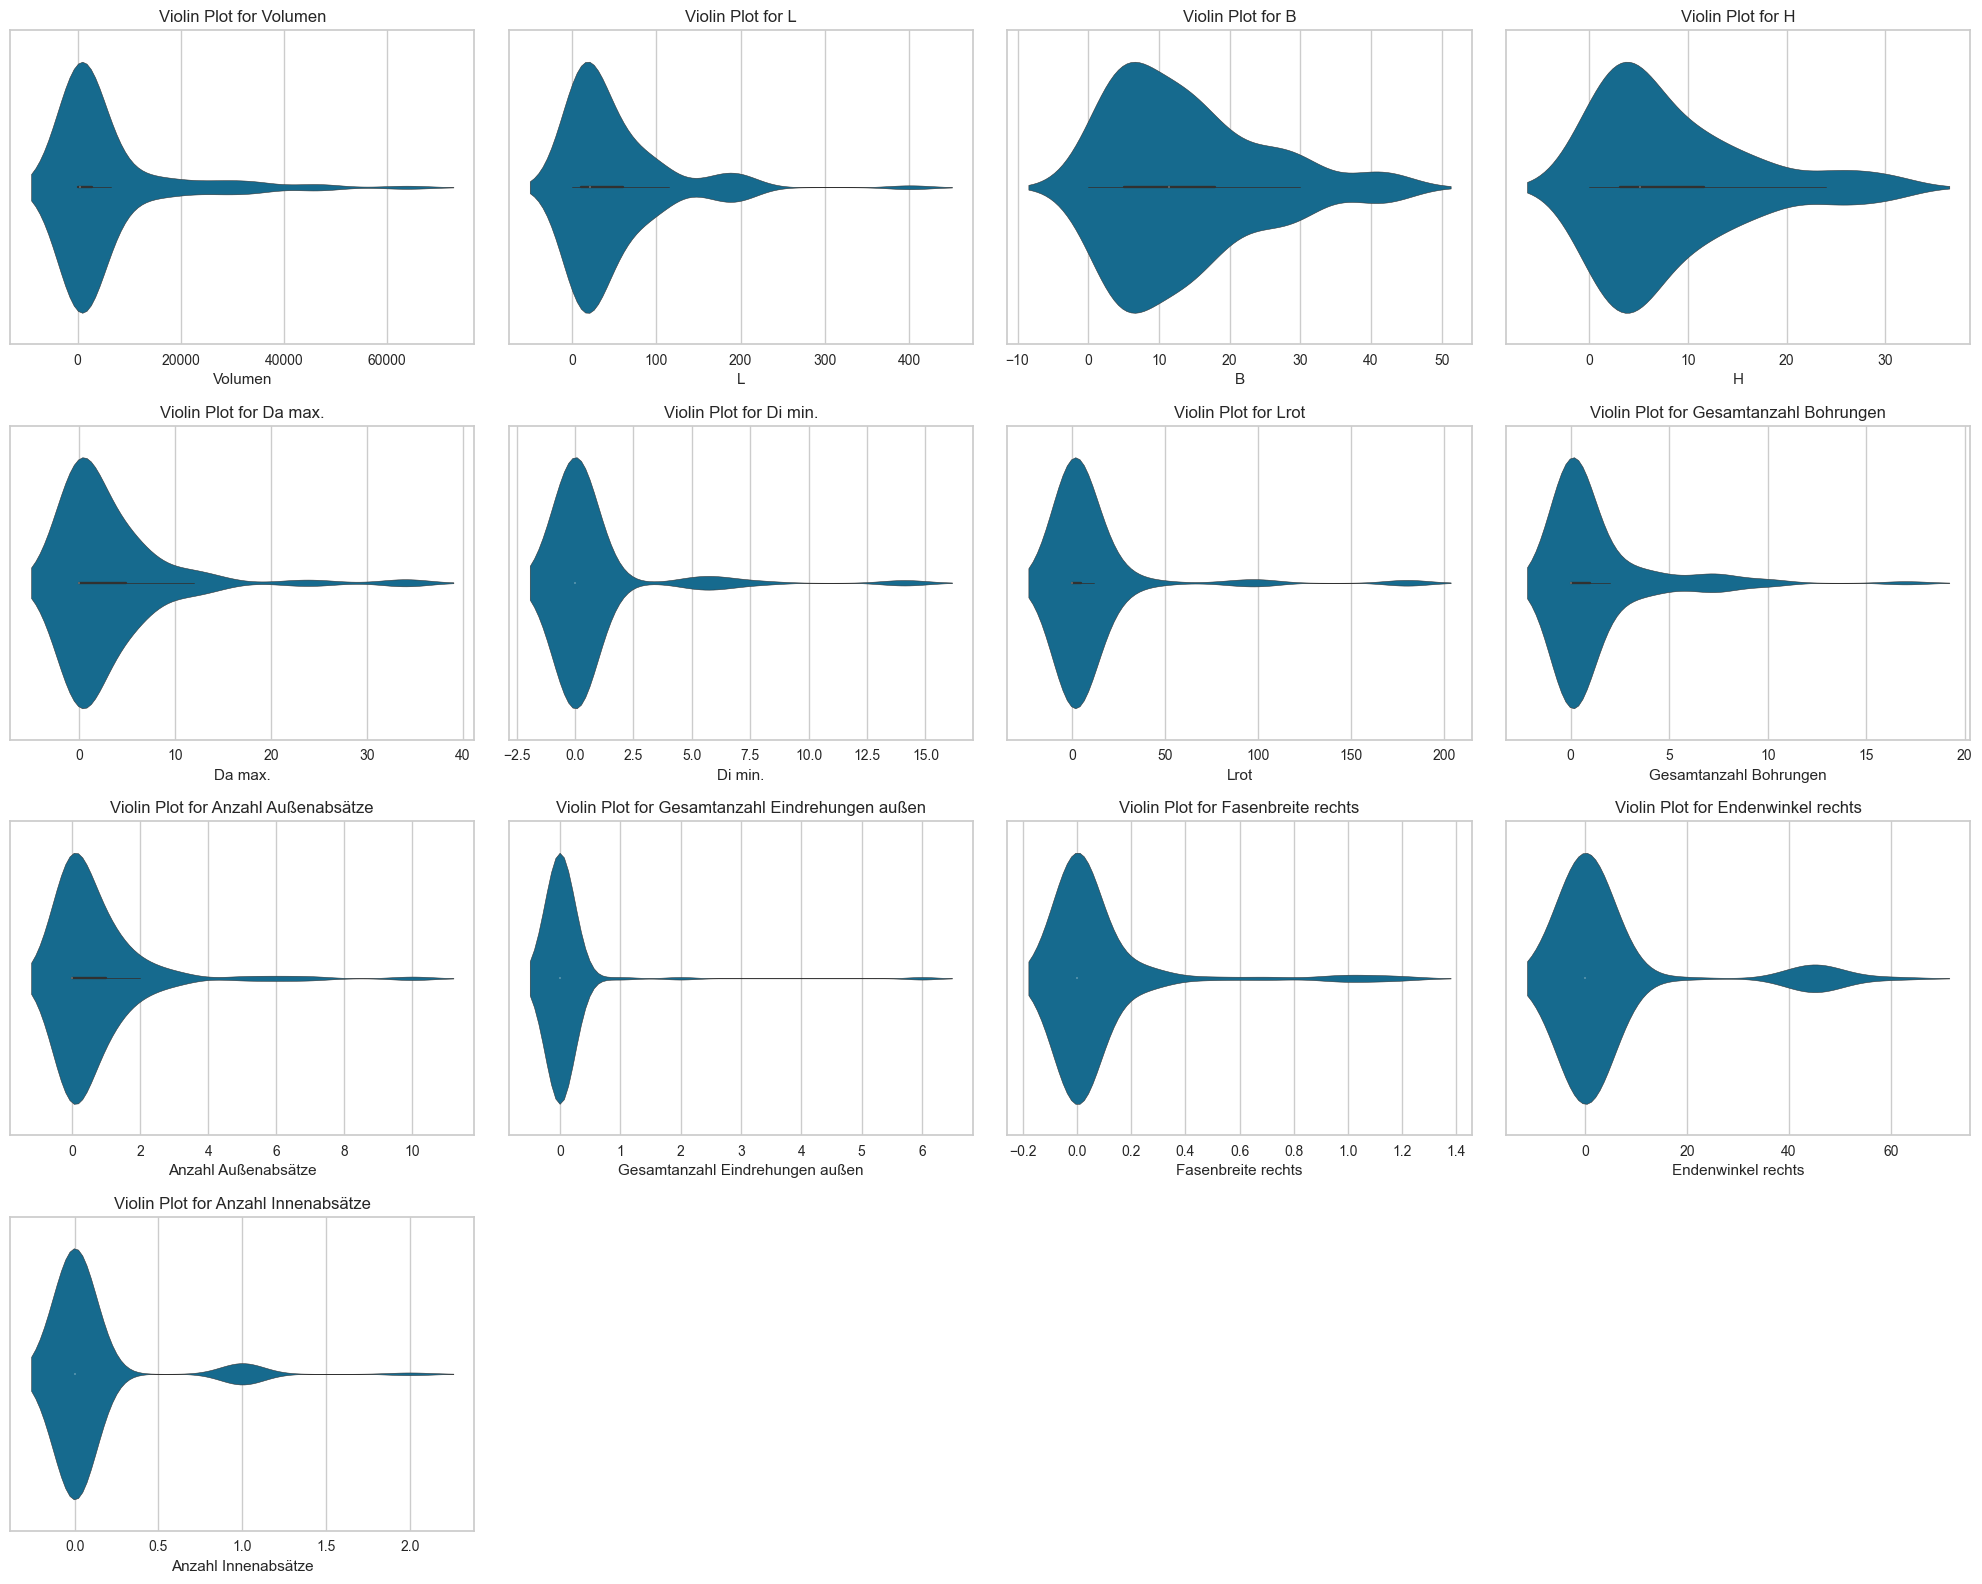

In [47]:
# show violonplot of data
exploration.violinplots(data, num_columns)

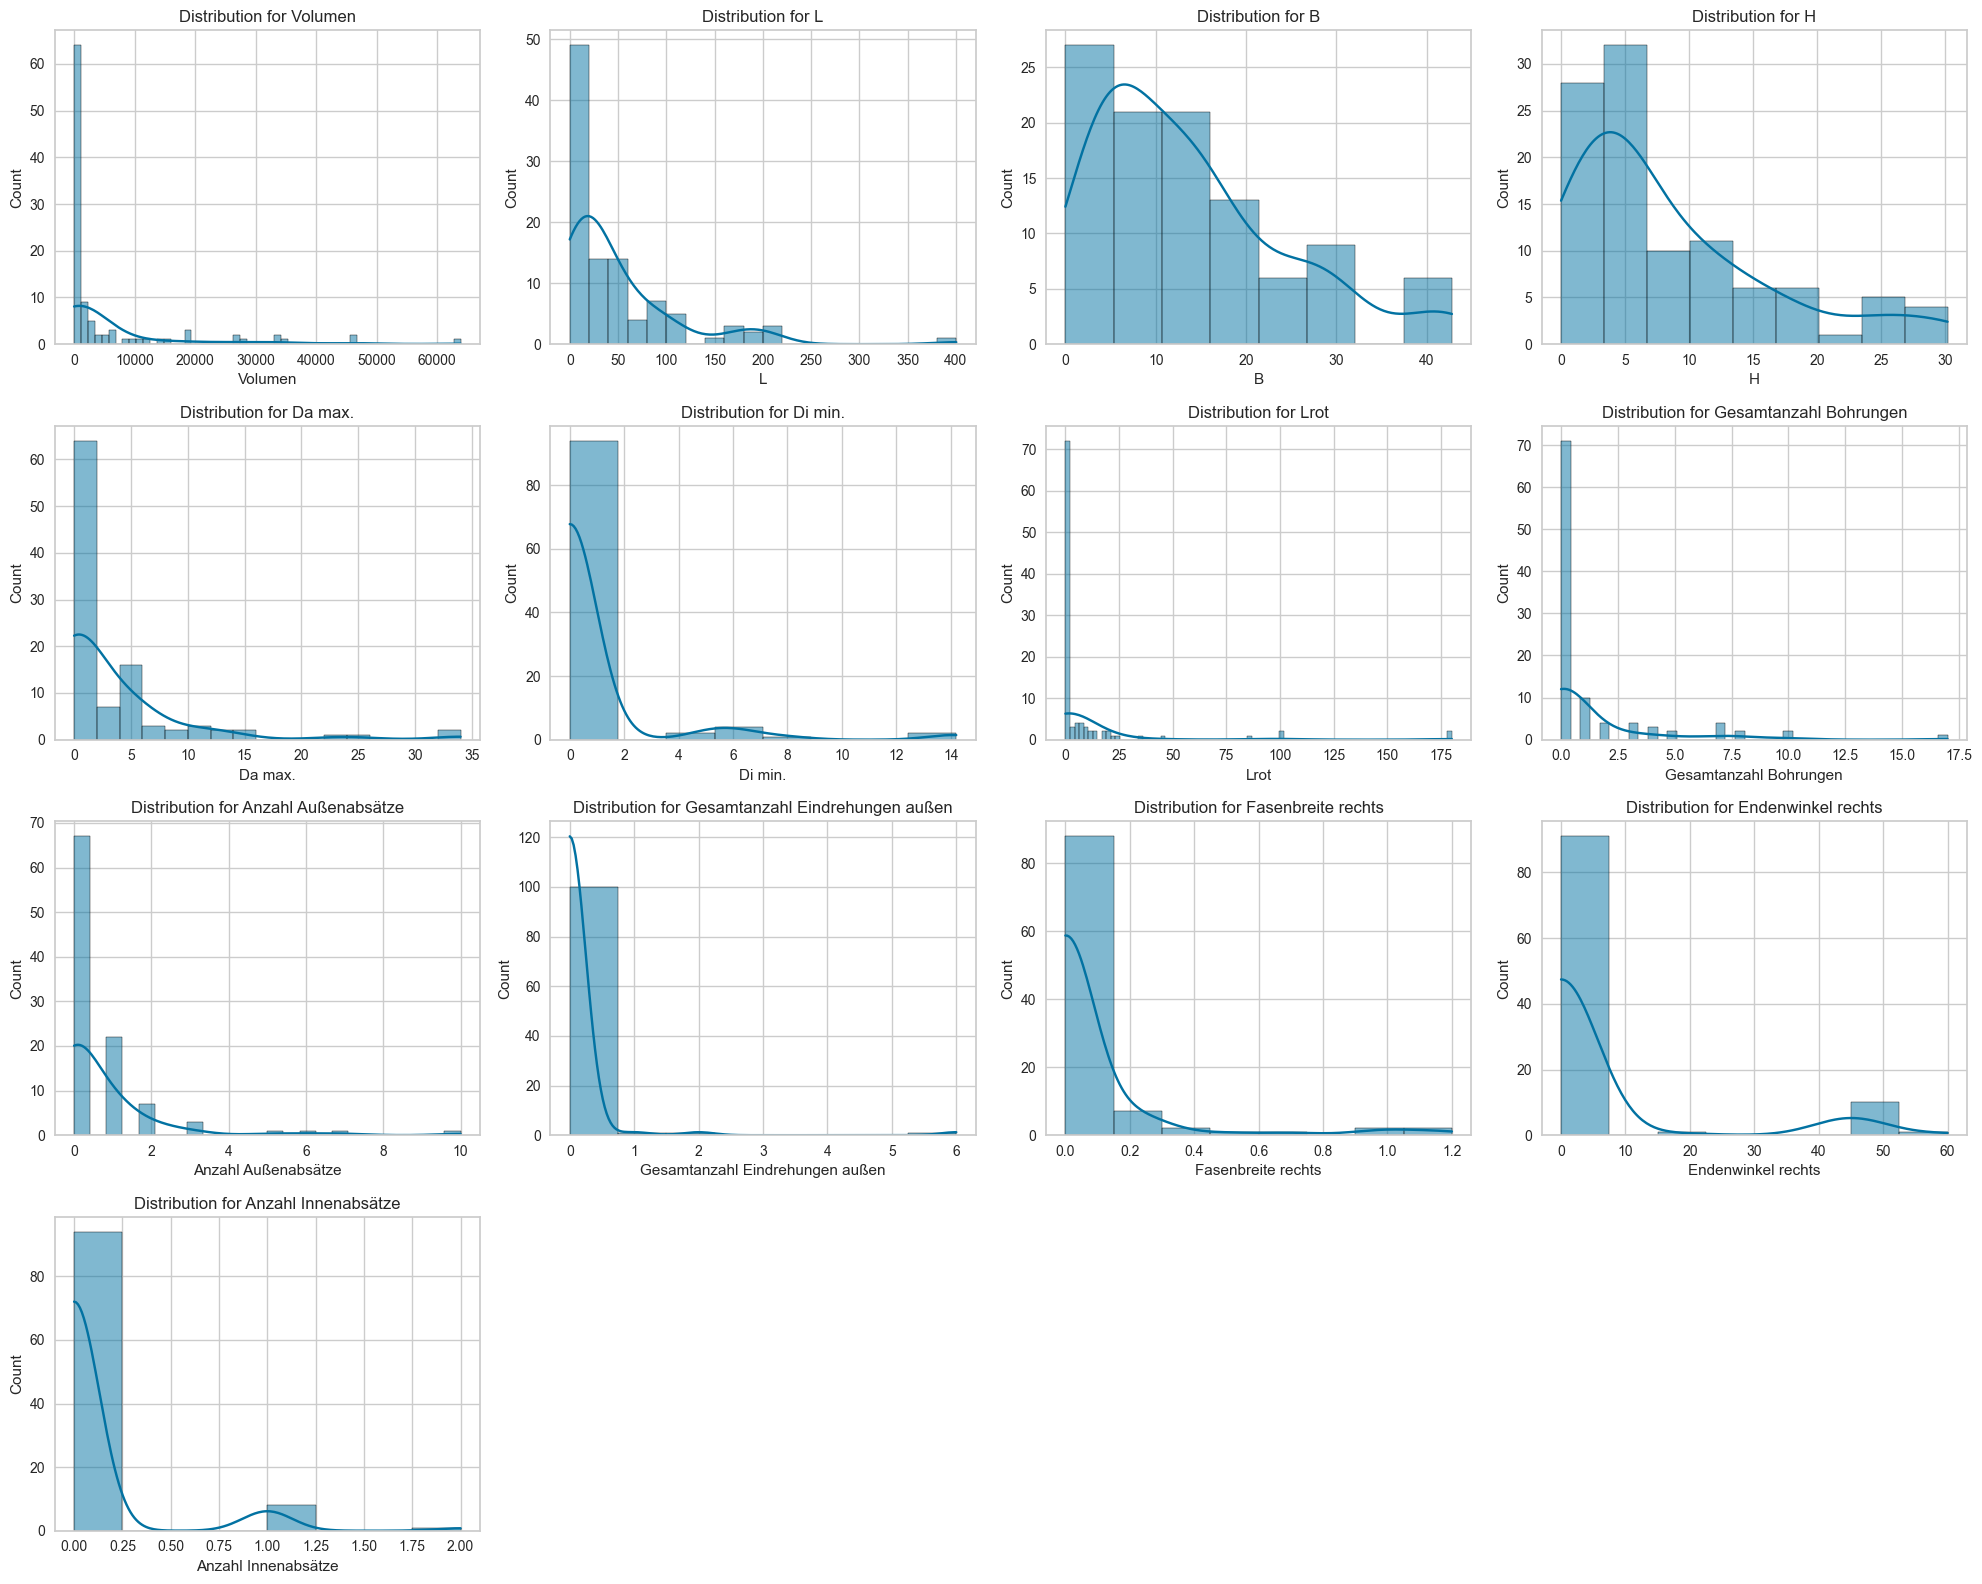

In [48]:
# show histograms of categorical columns
exploration.distributions(data, num_columns)

In [49]:
# show parallel_coordinates_plot of data
# exploration.barplots(data, cat_columns)

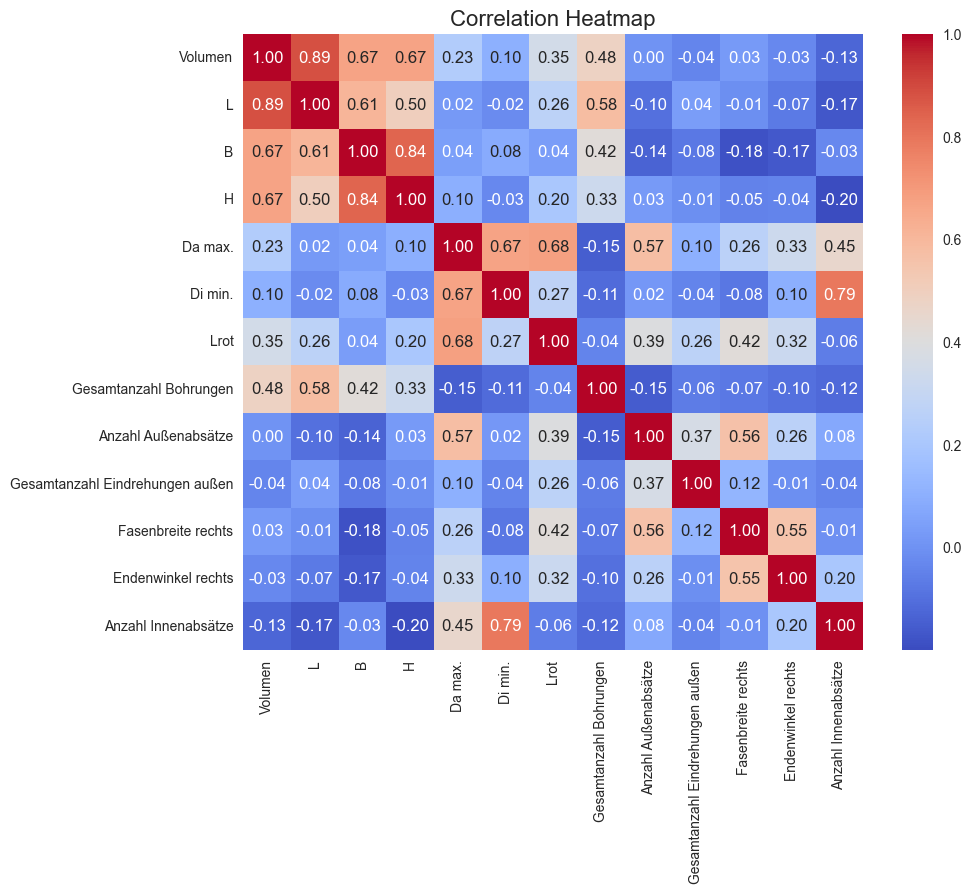

In [50]:
# show heatmap of data
exploration.heatmap(data, num_columns)

In [51]:
# z-score analysis of data
exploration.z_score_analysis(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_Ebene,Innenform_Einzeleindrehung,Innenform_ungleichmäßiger Einstich mit Ebene und Konus,Innenform_Rasteranordnung,Innenform_Rotationsteilinnenfläche,Innenform_Teilschräge,Innenform_einseitig steigend,Innenform_ungleichmäßiger Einstich Ebenen beidseitig,Innenform_freie Anordnung,Innenform_mehrfache Eindrehung
12,185.89,13.3,5.00,5.00,5.00,0.0,13.3,0.0,7.0,2.0,...,0,0,0,0,0,0,0,1,0,1
18,19012.51,160.0,23.55,17.70,0.00,0.0,0.0,17.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
26,46322.82,180.0,30.00,26.00,34.00,0.0,180.0,4.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29,690.43,101.0,3.70,3.70,3.70,0.0,101.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
35,10212.72,46.5,25.00,25.00,25.00,0.0,46.5,0.0,10.0,1.0,...,0,1,0,0,0,0,0,1,0,0
37,2053.46,22.6,22.60,11.20,22.60,14.2,11.2,1.0,1.0,0.0,...,0,0,0,0,1,1,1,0,0,0
44,1854.17,86.5,6.00,6.00,6.00,0.0,86.5,0.0,3.0,6.0,...,1,1,1,0,0,0,0,0,0,0
49,26979.88,203.0,29.55,8.80,0.00,0.0,0.0,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
50,33547.89,203.0,29.55,14.80,0.00,0.0,0.0,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
61,63866.62,400.5,27.99,23.00,0.00,0.0,0.0,8.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# apply isolation forest to detect outliers
exploration.isolation_forest(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_Ebene,Innenform_Einzeleindrehung,Innenform_ungleichmäßiger Einstich mit Ebene und Konus,Innenform_Rasteranordnung,Innenform_Rotationsteilinnenfläche,Innenform_Teilschräge,Innenform_einseitig steigend,Innenform_ungleichmäßiger Einstich Ebenen beidseitig,Innenform_freie Anordnung,Innenform_mehrfache Eindrehung
26,46322.82,180.0,30.00,26.0,34.0,0.0,180.0,4.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29,690.43,101.0,3.70,3.7,3.7,0.0,101.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
35,10212.72,46.5,25.00,25.0,25.0,0.0,46.5,0.0,10.0,1.0,...,0,1,0,0,0,0,0,1,0,0
37,2053.46,22.6,22.60,11.2,22.6,14.2,11.2,1.0,1.0,0.0,...,0,0,0,0,1,1,1,0,0,0
61,63866.62,400.5,27.99,23.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
68,46475.53,180.0,30.00,26.0,34.0,14.0,180.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


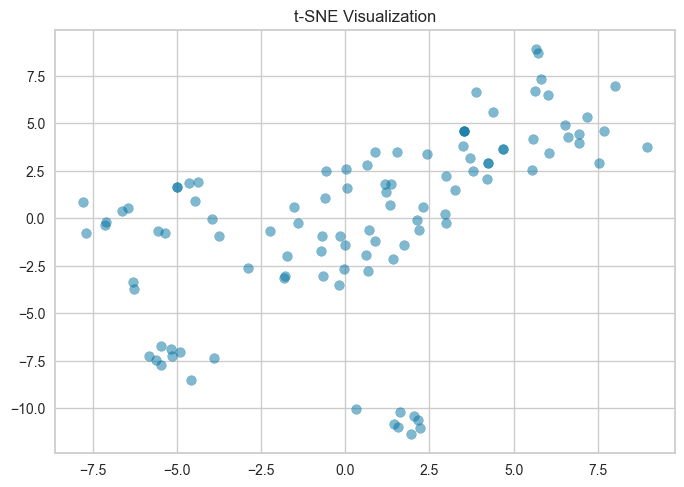

In [53]:
# apply tsne_visualization to visualize the data
exploration.tsne_visualization(data_preprocessed, num_columns)

__Clustering__

In [54]:
### calculate distance matrix
distance_matrix = clustering.gower_distance(data)

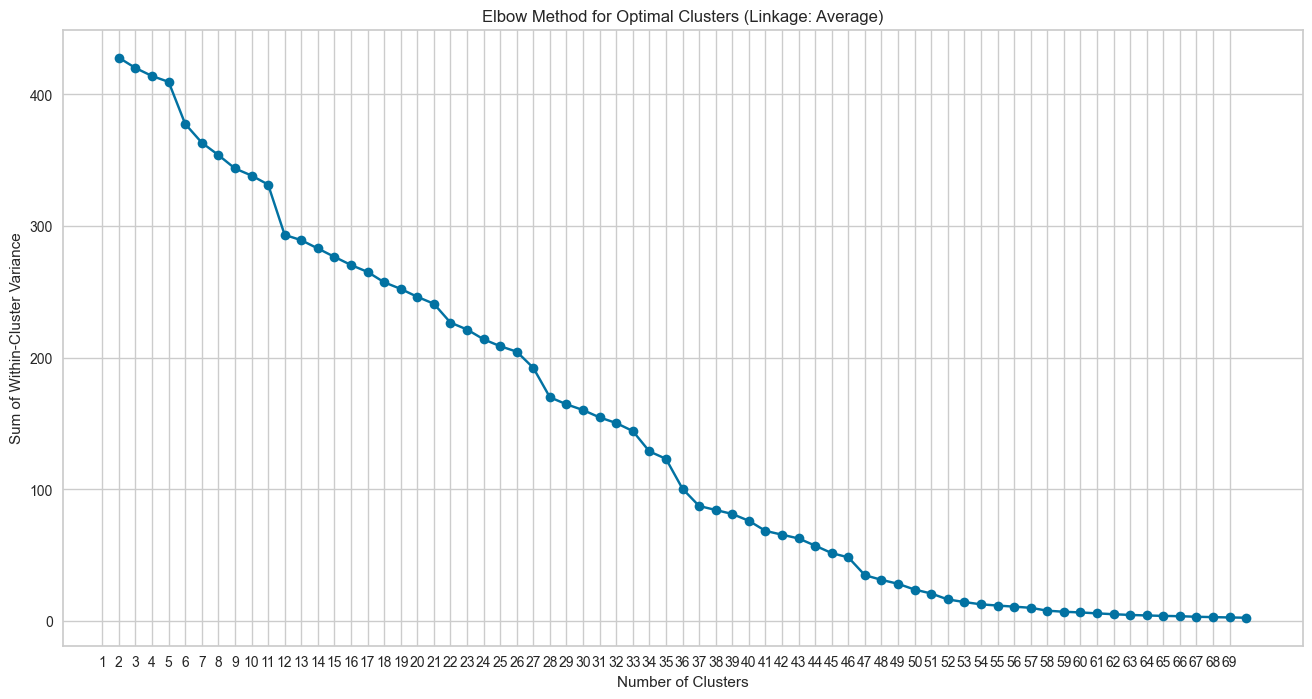

In [60]:
### plot the elbow plot for the first 20 clusters
clustering.elbow_plot_agglomerative(data_preprocessed, distance_matrix, 70)

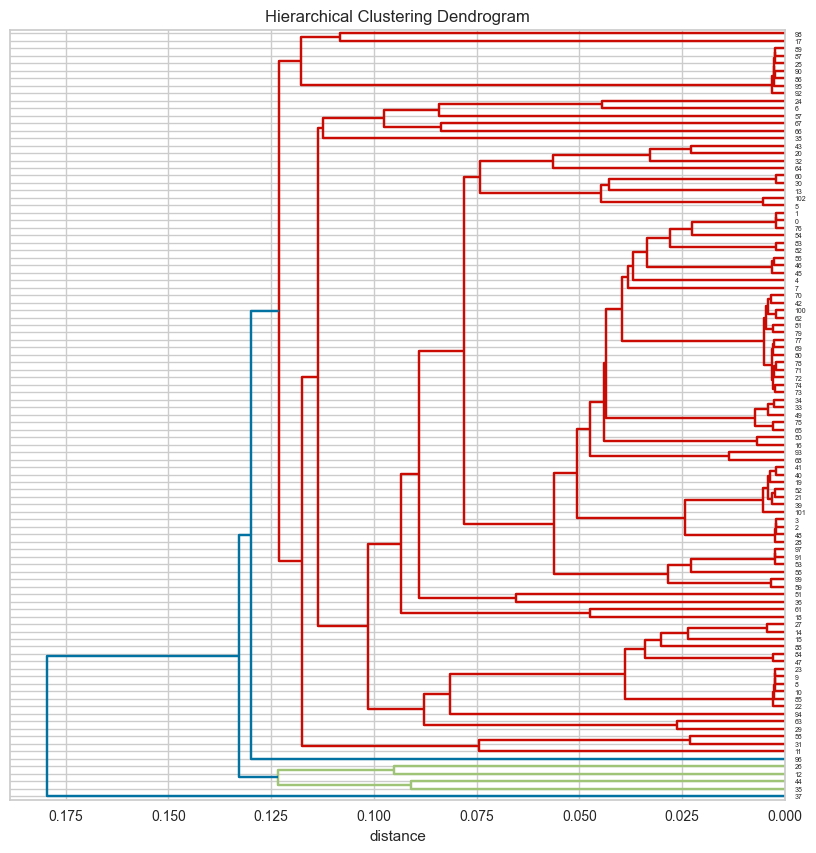

In [56]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

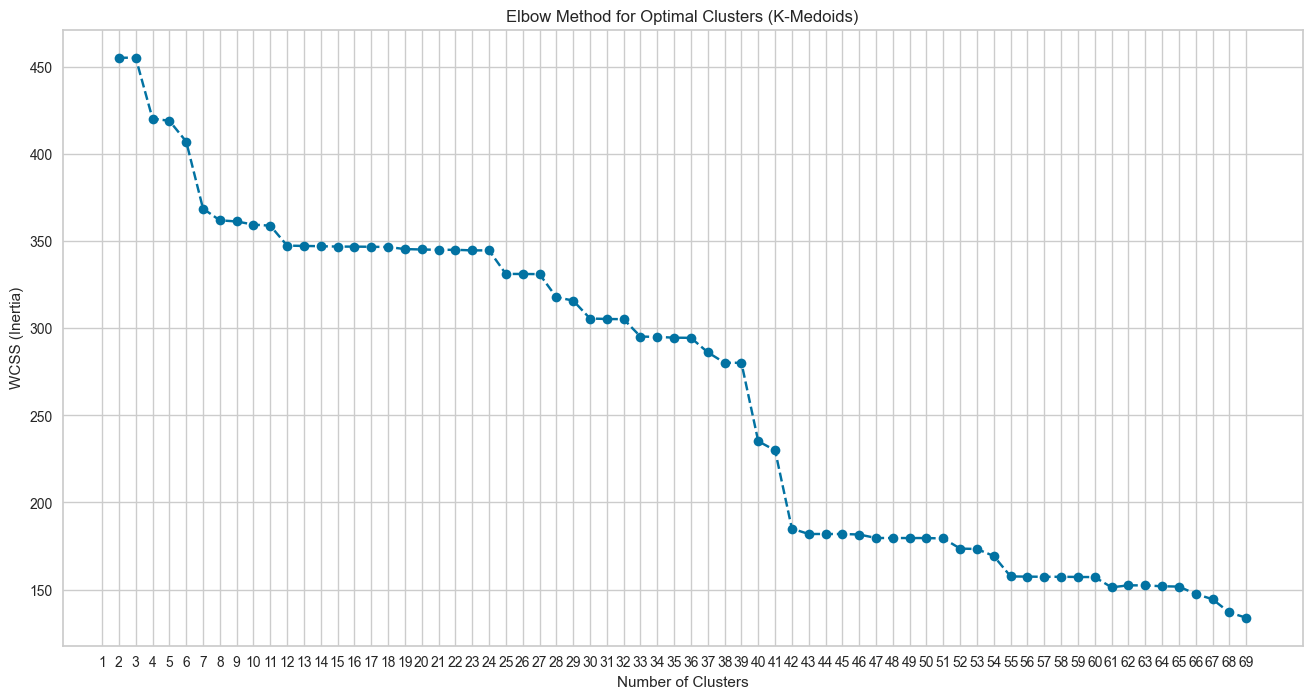

In [59]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.elbow_plot_kmedoids(data_preprocessed, 70)

__Evaluation__

In [66]:
labels = clustering.agglomerative_clustering(distance_matrix, 58)

In [67]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 0.10253143092831384,
 'ch-score': 889.7611072586636,
 'dunn-index': 1.6991708386603692,
 'silhouette-score': 0.4760329189057874}

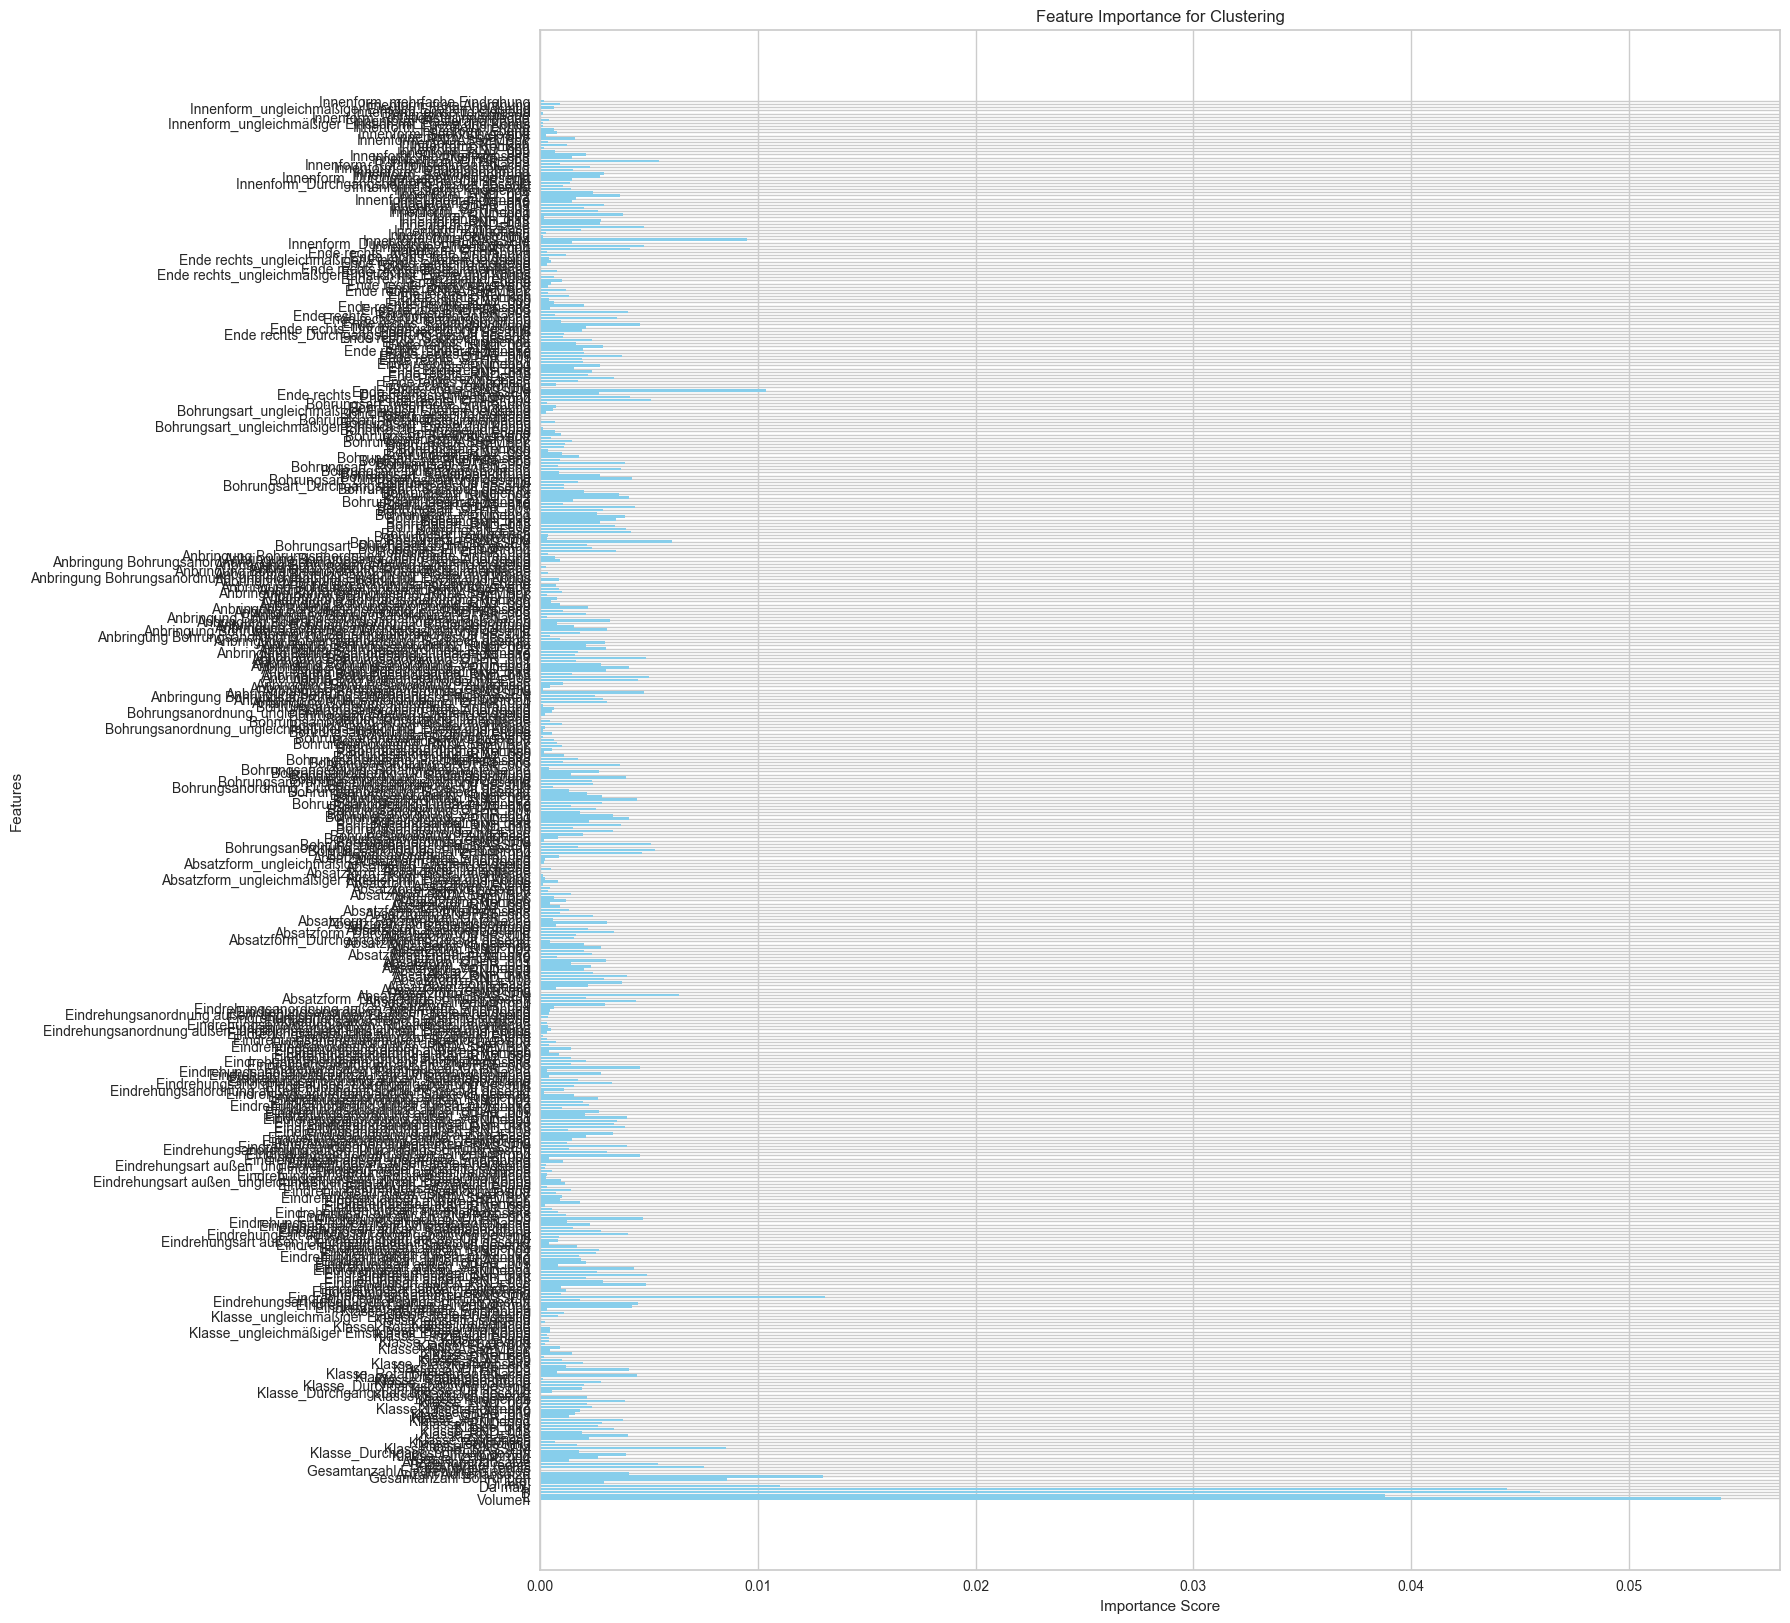

In [68]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

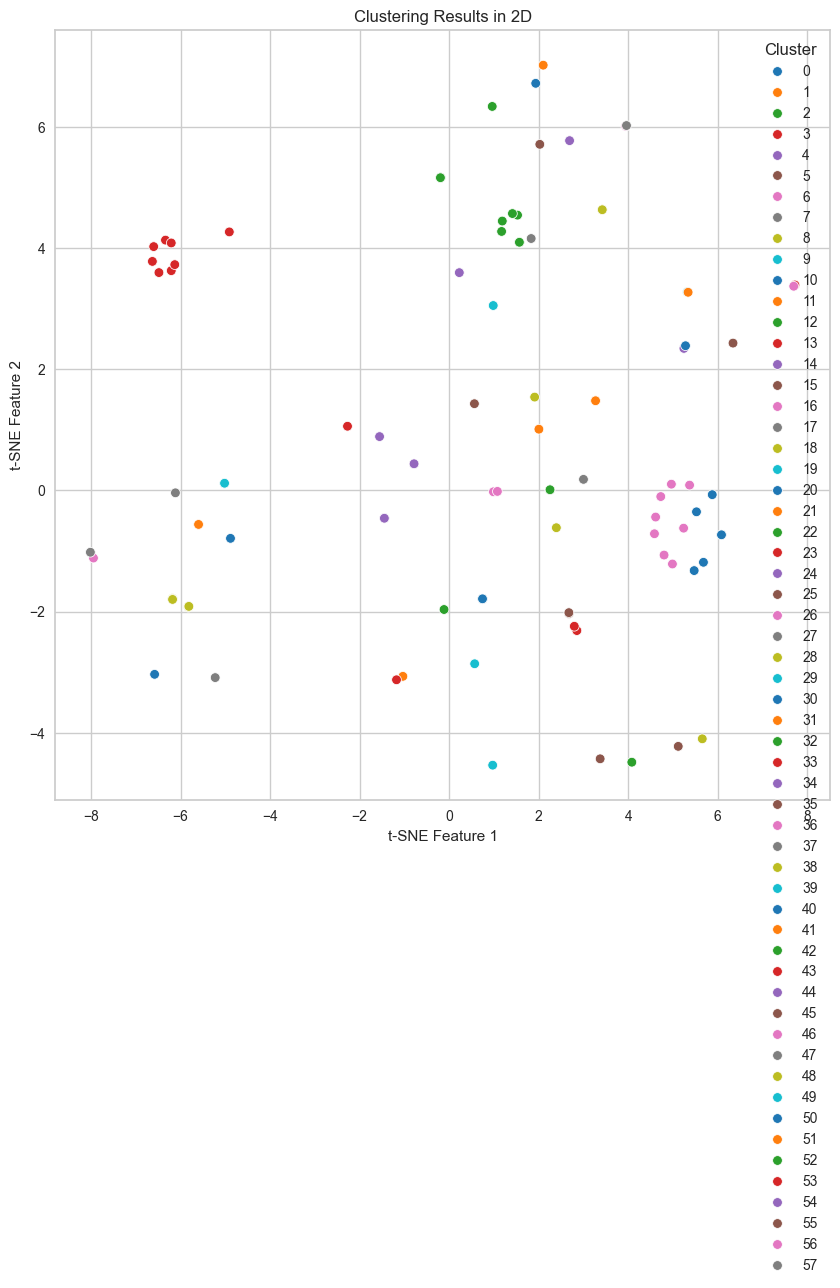

In [69]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)

In [70]:
labels = clustering.kmedoids_clustering(distance_matrix, 42)

In [71]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 1.4316442456806031,
 'ch-score': 2.1000276911001916,
 'dunn-index': 0.0,
 'silhouette-score': -0.02743441042951338}

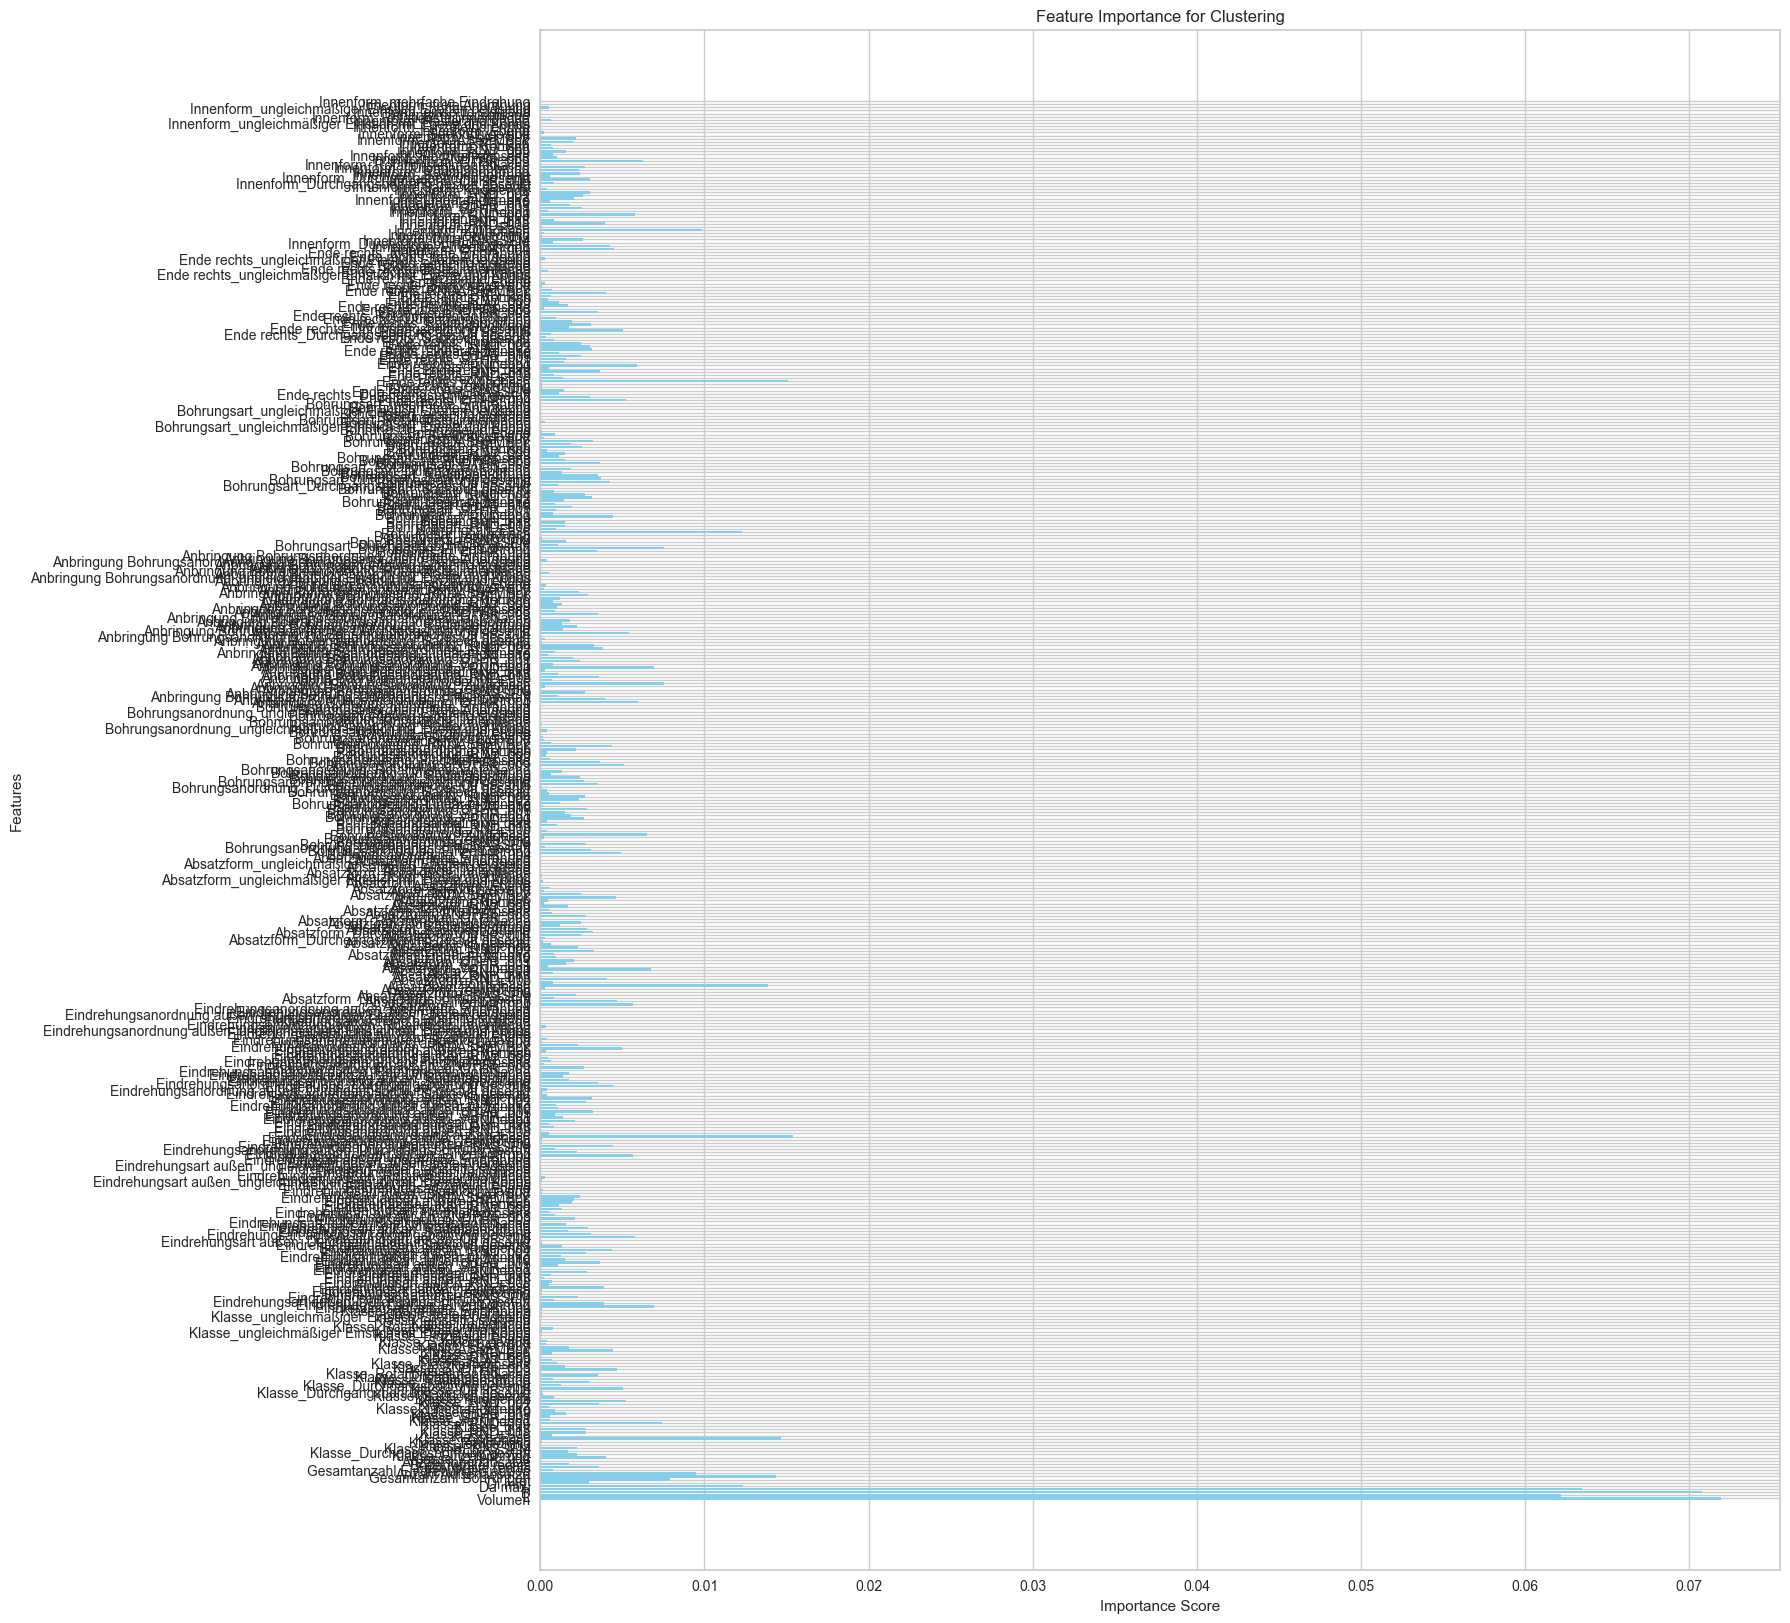

In [72]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

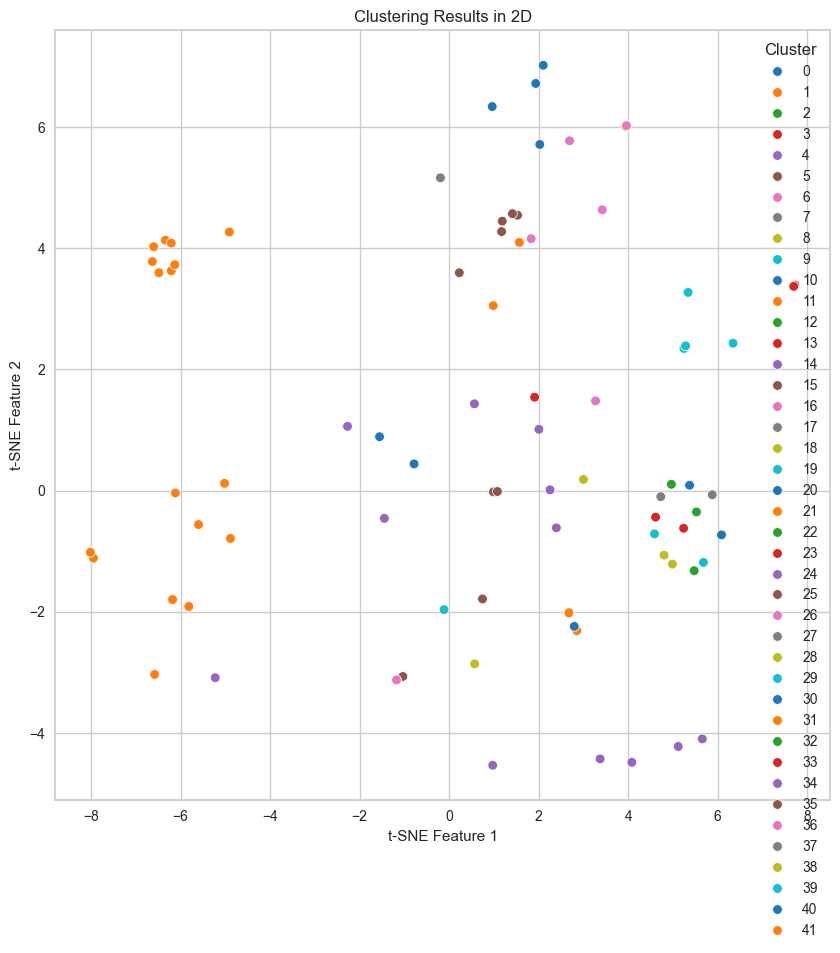

In [73]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)